<a href="https://colab.research.google.com/github/gabrieldimas/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

In [20]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tugas Praktikum

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

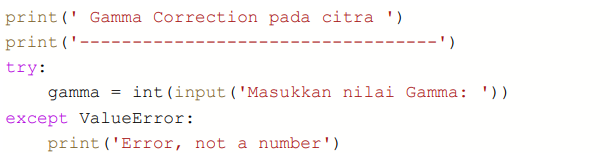

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


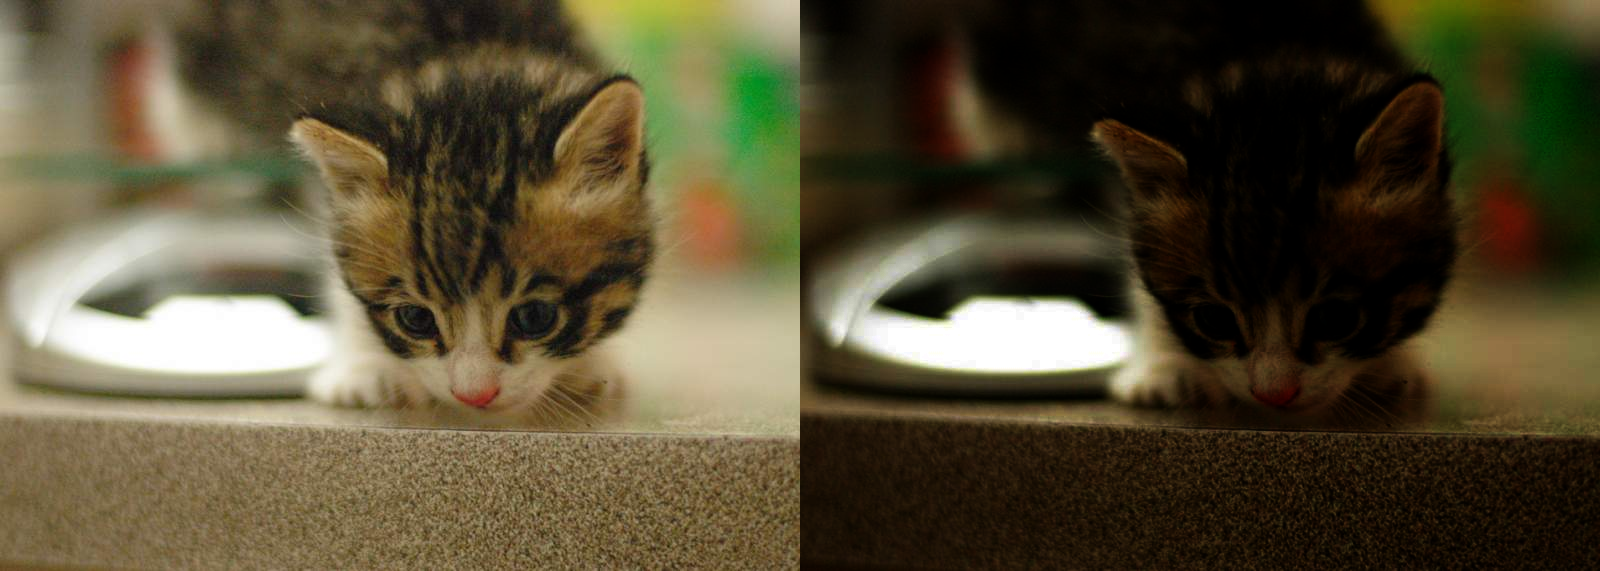

In [26]:
image = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

gamma_corrected = np.power(image / 255.0, gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)

gamma_ccat = cv.hconcat((image,gamma_corrected))
cv2_imshow(gamma_ccat)

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

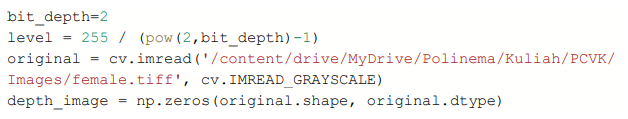

In [47]:
bit_depth = 2
original = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif', cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

bit = 2**bit_depth
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

IndexError: ignored

In [43]:
# Baca gambar asli
image = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/assets/catto.jfif')  # Ganti 'image.jpg' dengan path gambar Anda

# Buat maska dengan bentuk yang sesuai dengan gambar asli
mask = np.zeros(image.shape[:2], dtype=np.uint8)
cv.circle(mask, (250, 250), 100, 255, -1)  # Contoh: Membuat lingkaran sebagai maska

# Gunakan maska untuk memodifikasi gambar asli
masked_image = cv.bitwise_and(image, image, mask=mask)

# Tampilkan gambar asli dan hasil masking
# cv2_imshow(image)
# cv2_imshow(mask)
# cv2_imshow(masked_image)
concatenated_image = np.hstack((image, mask, masked_image))
cv2_imshow(concatenated_image)

ValueError: ignored